In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
import ast

In [128]:
sesion = pd.read_csv("datos.csv")[['timestamp', 'sample_number', 'channel_data']]
sesion.channel_data = sesion.channel_data.apply(ast.literal_eval)
# print(sesion.dtypes)
sesion.head()

,timestamp,sample_number,channel_data
0,9522373,1,"[7277484, -1724, 2854980, 2977, 30746, 501840,..."
1,9524378,2,"[7277869, -1744, 2854023, 2997, 30702, 501517,..."
2,9526382,3,"[7277404, -1747, 2853958, 3031, 30713, 501008,..."
3,9528386,4,"[7277226, -1741, 2854062, 2996, 30781, 501654,..."
4,9530393,5,"[7277001, -1740, 2854134, 3011, 30795, 501968,..."


In [129]:
channel_data_df = sesion.channel_data.apply(pd.Series) * 2400 / (2**23 - 1) # Convert to a millivolts
channel_data_df.columns = ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
sesion = pd.concat([sesion.drop('channel_data', axis=1), channel_data_df], axis=1)
sesion.timestamp = sesion.timestamp.apply(lambda x: (x - sesion.timestamp.iloc[0]) / 10 ** 6)
sesion.head()

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,0.000000,1,2082.105122,-0.493240,816.816427,0.851727,8.796502,143.577593,14.936830,0.0
1,0.002005,2,2082.215271,-0.498962,816.542627,0.857449,8.783914,143.485182,14.925100,0.0
2,0.004009,3,2082.082234,-0.499821,816.524031,0.867176,8.787061,143.339556,14.937689,0.0
3,0.006013,4,2082.031307,-0.498104,816.553785,0.857163,8.806516,143.524378,14.961435,0.0
4,0.008020,5,2081.966934,-0.497818,816.574385,0.861454,8.810521,143.614214,14.974024,0.0


In [130]:
sesion.head(20)

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,0.000000,1,2082.105122,-0.493240,816.816427,0.851727,8.796502,143.577593,14.936830,0.0
1,0.002005,2,2082.215271,-0.498962,816.542627,0.857449,8.783914,143.485182,14.925100,0.0
2,0.004009,3,2082.082234,-0.499821,816.524031,0.867176,8.787061,143.339556,14.937689,0.0
3,0.006013,4,2082.031307,-0.498104,816.553785,0.857163,8.806516,143.524378,14.961435,0.0
4,0.008020,5,2081.966934,-0.497818,816.574385,0.861454,8.810521,143.614214,14.974024,0.0
5,0.010027,6,2081.999264,-0.500107,816.574385,0.856590,8.832265,143.475454,14.979746,0.0
6,0.012030,7,2082.125149,-0.501823,816.557219,0.858307,8.825399,143.393343,14.964010,0.0
7,0.014034,8,2082.215271,-0.506973,816.550066,0.860024,8.806516,143.317526,14.943983,0.0
8,0.016037,9,2082.208119,-0.505543,816.589262,0.867176,8.797074,143.539541,14.952280,0.0
9,0.018042,10,2082.090531,-0.499535,816.581537,0.863457,8.803083,143.625944,14.952852,0.0


In [131]:
sesion.tail(20)

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
4980,9.983350,4981,2081.755791,-0.499535,816.311457,-1.134110,-7.121659,143.501490,-8.953000,0.0
4981,9.985369,4982,2081.878815,-0.498390,816.316607,-1.134968,-7.122804,143.476026,-8.966733,0.0
4982,9.987373,4983,2081.968937,-0.500679,816.299727,-1.133537,-7.133962,143.480318,-8.974744,0.0
4983,9.989376,4984,2081.981240,-0.496388,816.320326,-1.133537,-7.127953,143.617361,-8.967878,0.0
4984,9.991383,4985,2081.863079,-0.494671,816.344358,-1.142120,-7.143117,143.641394,-8.977033,0.0
4985,9.993376,4986,2081.928311,-0.500393,816.338350,-1.144695,-7.155419,143.591898,-8.989049,0.0
4986,9.995383,4987,2081.934033,-0.498104,816.266825,-1.132965,-7.139398,143.501490,-8.981038,0.0
4987,9.997391,4988,2081.774388,-0.494957,816.224196,-1.129818,-7.128240,143.447416,-8.973027,0.0
4988,9.999398,4989,2081.713162,-0.493240,816.262247,-1.133537,-7.127667,143.597048,-8.967019,0.0
4989,10.001404,4990,2081.680260,-0.494099,816.276552,-1.130104,-7.123948,143.602484,-8.953858,0.0


In [132]:
sesion.shape

(5000, 10)

In [135]:
x1 = sesion.channel_4
x2 = sesion.channel_7
t = sesion.timestamp

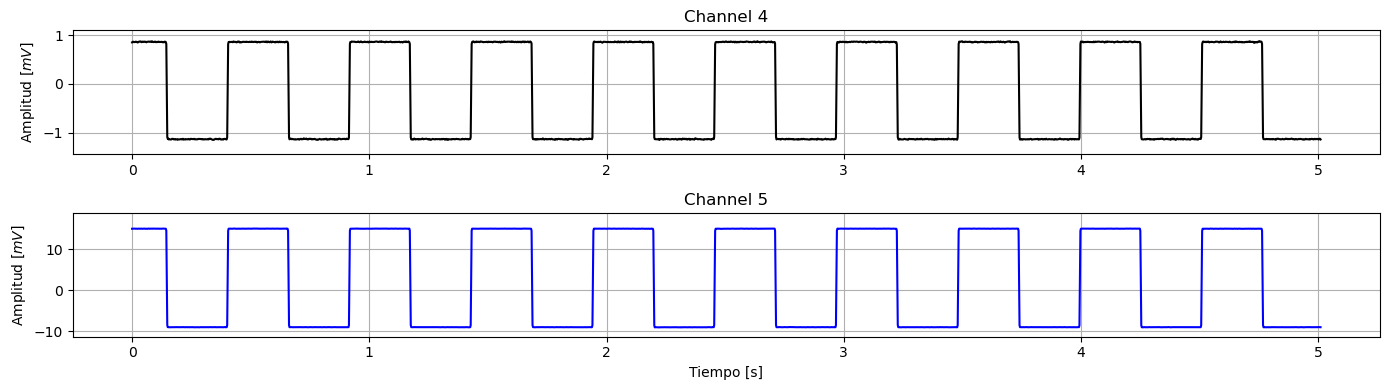

In [136]:
fig, axs = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
axs[0].plot(t[:2500], x1[:2500], lw=1.5, color='k')
axs[0].set_ylabel('Amplitud [$mV$]') # 'Amplitud [$\mu V$]'
# axs[0].set_xlim([1, 5])
axs[0].set_ylim([x1.min() - abs(x1.min() * 0.25), x1.max() +  abs(x1.max() * 0.25)])
axs[0].set_title('Channel 4')
axs[0].grid()

# axs[1].plot(t[N - 200*60:N], x[N - 200*60:N]) #, lw=1.5, color='k')
axs[1].plot(t[:2500], x2[:2500], lw=1.5, color='b')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [$mV$]')
# axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
axs[1].set_ylim([x2.min() - abs(x2.min() * 0.25), x2.max() +  abs(x2.max() * 0.25)])
axs[1].set_title('Channel 5')
axs[1].grid()

plt.show()

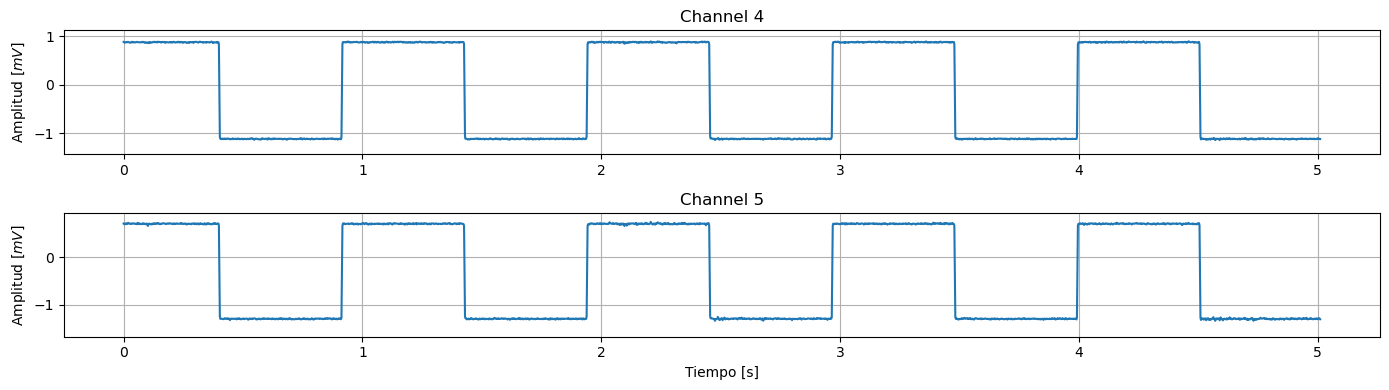

In [104]:
fig, axs = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
axs[0].plot(t[:2500], x1[:2500]) #, lw=1.5, color='k')
axs[0].set_ylabel('Amplitud [$mV$]') # 'Amplitud [$\mu V$]'
# axs[0].set_xlim([1, 5])
axs[0].set_ylim([x1.min() - abs(x1.min() * 0.25), x1.max() +  abs(x1.max() * 0.25)])
axs[0].set_title('Channel 4')
axs[0].grid()

# axs[1].plot(t[N - 200*60:N], x[N - 200*60:N]) #, lw=1.5, color='k')
axs[1].plot(t[:2500], x2[:2500]) #, lw=1.5, color='k')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [$mV$]')
# axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
axs[1].set_ylim([x2.min() - abs(x2.min() * 0.25), x2.max() +  abs(x2.max() * 0.25)])
axs[1].set_title('Channel 5')
axs[1].grid()

# axs[2].plot(t[:2500], x3[:2500]) #, lw=1.5, color='k')
# axs[2].set_xlabel('Tiempo [s]')
# axs[2].set_ylabel('Amplitud [$mV$]')
# # axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
# axs[2].set_ylim([x3.min() - abs(x3.min() * 0.25), x3.max() +  abs(x3.max() * 0.25)])
# axs[2].set_title('Channel 7')
# axs[2].grid()

plt.show()